In [1]:
import numpy as np
fruits = np.load("../Data/fruits.npy")
fruits.shape

(300, 100, 100)

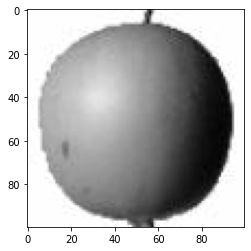

In [2]:
# image확인하기
import matplotlib.pyplot as plt

plt.imshow(fruits[0].reshape(100, 100), cmap='gray_r')
plt.show()

In [3]:
# Target 만들기
target  = np.concatenate([np.zeros(100), np.ones(100), np.full(100, 2)])
target.shape

(300,)

In [4]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

### train과 test로 분류하기

In [5]:
train = fruits.reshape(-1, 100, 100, 1) / 255.0

In [6]:
from sklearn.model_selection import train_test_split

trainData, testData, trainTargetData, testTargetData = train_test_split(
    train, target, test_size=0.2, random_state=42
)

In [7]:
trainData, valData, trainTargetData, valTargetData = train_test_split(
    trainData, trainTargetData, test_size=0.2, random_state=42
)

In [8]:
print(trainData.shape)
print(valData.shape)
print(trainTargetData.shape)
print(valTargetData.shape)

(192, 100, 100, 1)
(48, 100, 100, 1)
(192,)
(48,)


---
# CNN 만들기

In [9]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

warnings.filterwarnings('ignore')

In [10]:
model = keras.Sequential()

In [11]:
model.add(keras.layers.Conv2D(
        20,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (100, 100, 1)
    
))

In [12]:
model.add(keras.layers.MaxPool2D(2))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 20)      200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 20)       0         
 )                                                               
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(
    keras.layers.Conv2D(
        60, # 필터의 갯수
        kernel_size=3,
        activation = 'relu',
        padding = 'same'
    )
)

In [15]:
model.add(keras.layers.MaxPool2D(2))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 20)      200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 60)        10860     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 60)       0         
 2D)                                                             
                                                                 
Total params: 11,060
Trainable params: 11,060
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 딥러닝 모델 만들기
model.add(keras.layers.Flatten()) # 1차원으로 쫙바뀌고
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation='softmax')) # 마지막 레이어 => 출력층

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 20)      200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 60)        10860     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 60)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 37500)             0         
                                                                 
 dense (Dense)               (None, 100)               3

In [19]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
            trainData, 
            trainTargetData,
            epochs=50, 
            validation_data=(valData, valTargetData),
            callbacks=[checkpoint_cb, early_stopping_cb]
        )

Epoch 1/50


2022-07-21 12:43:03.426882: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 1s 84ms/step - loss: 0.7067 - accuracy: 0.6667 - val_loss: 0.2822 - val_accuracy: 0.9167
Epoch 2/50
6/6 [==============================] - 0s 68ms/step - loss: 0.1487 - accuracy: 0.9531 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 3/50
6/6 [==============================] - 0s 67ms/step - loss: 0.0236 - accuracy: 0.9948 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 0s 67ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.5331e-04 - val_accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 0s 67ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.4091e-04 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 0s 66ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 6.7916e-05 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 0s 68ms/step - loss: 1.3116e-04 - accuracy: 1.0000 - val_loss: 4.8633e-05 - val_accuracy: 1.0000
Epoch 8/50
6/6 [==

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

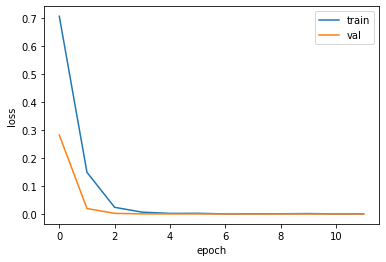

In [23]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [24]:
model.evaluate(valData, valTargetData)

2/2 [==============================] - 0s 11ms/step - loss: 2.0494e-05 - accuracy: 1.0000


[2.049398608505726e-05, 1.0]

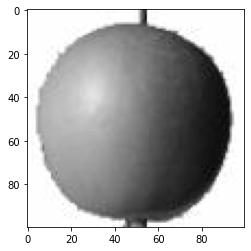

In [25]:
# 이미지 확인해보기
plt.imshow(valData[0].reshape(100,100), cmap='gray_r')
plt.show()

In [26]:
pred = model.predict(valData[0:1])
print(pred)

1/1 [==============================] - 0s 49ms/step
[[9.9980229e-01 1.9778703e-04 1.6434598e-08]]


In [27]:
model.evaluate(testData, testTargetData)

2/2 [==============================] - 0s 16ms/step - loss: 3.0430e-05 - accuracy: 1.0000


[3.043023207283113e-05, 1.0]